In [1]:
from network.srcnn import srcnn

import numpy
import math
import cv2

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.


In [2]:
IMG_NAME = "./imageTrain/yayoi_first_030.png"

#FILEPATH_WEIGHT = "./preTrained/"
#FILENAME_WEIGHT = "srcnn.h5"

FILEPATH_WEIGHT = ""
FILENAME_WEIGHT = "yayoi_4_2018-07-13_041045.h5"

OPENCV_NAME = "opencv.bmp"
SRCNN_NAME = "srcnn.bmp"

INTERPOLATION = cv2.INTER_CUBIC
SCALE = 4

In [ ]:
# dnn configuration for waifu2x
from network.waifu2x import waifu2x
dnn = waifu2x()
dnn.in_train = True

In [3]:
tick1 = cv2.getTickCount()

In [4]:
model = dnn.network()
model.load_weights(FILEPATH_WEIGHT + FILENAME_WEIGHT)

/home/jovyan/work/network/srcnn.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, kernel_initializer="glorot_uniform", activation="relu", padding="valid", input_shape=(None, Non..., kernel_size=(9, 9), use_bias=True)`
  activation='relu', padding='valid', bias=True, input_shape=(None, None, 1)))
/home/jovyan/work/network/srcnn.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_initializer="glorot_uniform", activation="relu", padding="same", kernel_size=(5, 5), use_bias=True)`
  activation='relu', padding='same', bias=True))
/home/jovyan/work/network/srcnn.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=1, kernel_initializer="glorot_uniform", activation="linear", padding="valid", kernel_size=(5, 5), use_bias=True)`
  activation='linear', padding='valid', bias=True))


In [5]:
img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
shape = img.shape

Y_img = cv2.resize(img[:, :, 0], (int(shape[1] * SCALE), int(shape[0] * SCALE)), INTERPOLATION)
img = cv2.resize(img, (int(shape[1] * SCALE), int(shape[0] * SCALE)), INTERPOLATION)

#Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / sizeMux), int(shape[0] / sizeMux)), cv2.INTER_CUBIC)
#Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
#img[:, :, 0] = Y_img

img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(OPENCV_NAME, img)

True

In [6]:
Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
Y[0, :, :, 0] = Y_img.astype(float) / 255.

pre = model.predict(Y, batch_size=1) * 255.
pre[pre[:] > 255] = 255
pre[pre[:] < 0] = 0

pre = pre.astype(numpy.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(SRCNN_NAME, img)

True

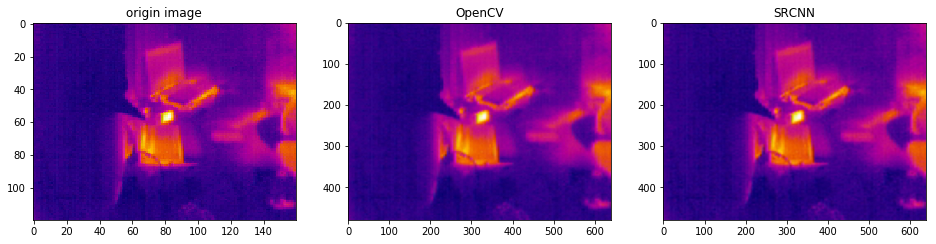

In [7]:
# display image
im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread(OPENCV_NAME, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.imread(SRCNN_NAME, cv2.IMREAD_COLOR)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

plt.figure(num='srcnn',figsize=(16,16))

plt.subplot(1,3,1)
plt.title('origin image')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('OpenCV')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('SRCNN')
plt.imshow(im3)

In [8]:
tick2 = cv2.getTickCount()
tick = math.floor( ((tick2 - tick1) * 1000) / cv2.getTickFrequency())

if tick >= 60000:
    mins = math.floor(tick / 60000)
    secs = math.floor((tick - mins * 60000) / 1000)
    msec = tick - mins * 60000 - secs * 1000
    print("processed time: " + str(mins) + " mins " + str(secs) + " secs " + str(msec) + " ms")
elif tick >= 1000:
    secs = math.floor(tick / 1000)
    msec = tick - secs * 1000
    print("processed time: " + str(secs) + " secs " + str(msec) + " ms")
else:
    print("processed time: " + str(tick) + " ms")

processed time: 15 secs 648 ms
